In [346]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [347]:
df = pd.read_csv('../zuu crew scores.csv')
df = df[df['CourseName']=='Foundations of ML']
df.head()

,MemberName,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CourseName,CapstoneScore
0,Theekshana Rathnayake,3,79.9,43.7,2,0,62.8,5.0,Foundations of ML,45.3
1,Mayura Sandakalum Sellapperuma,2,76.8,95.6,6,0,87.4,2.7,Foundations of ML,78.8
2,Amila Narangoda,3,96.6,75.9,8,0,98.4,2.8,Foundations of ML,65.4
4,Tharusha Vihanga,2,83.2,24.0,6,0,41.8,4.2,Foundations of ML,40.1
7,Chamath Perera,3,86.5,88.0,5,0,23.9,1.3,Foundations of ML,68.2


In [348]:
X = df['Attendance'].values.reshape(-1,1)
Y = df['CapstoneScore'].values

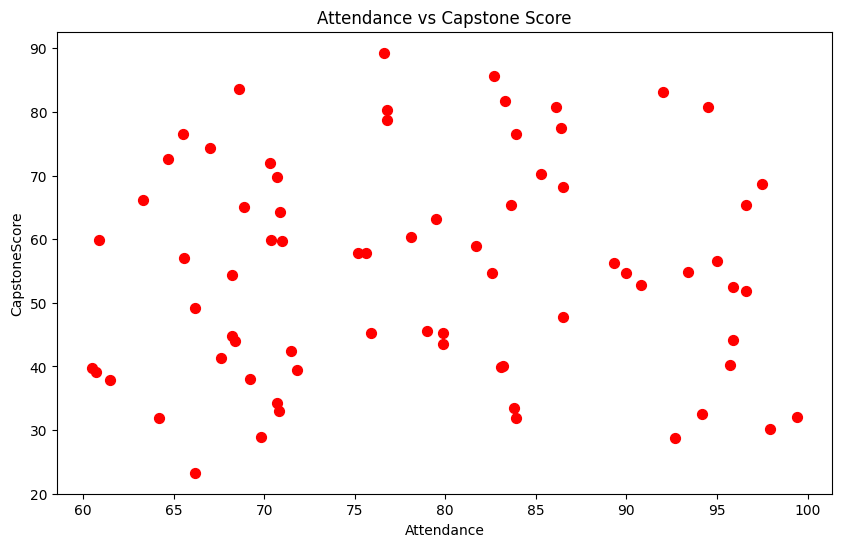

In [349]:
plt.figure(figsize=(10,6))
plt.scatter(X,Y,color='red',s=50)
plt.xlabel('Attendance')
plt.ylabel('CapstoneScore')
plt.title('Attendance vs Capstone Score')
plt.show()

In [350]:
def compute_cost(X,beta,Y):
    y_hat = X.dot(beta) 
    m = len(Y)
    cost = (1 /(2 * m)) * np.sum((y_hat - Y)**2)
    return cost

In [351]:
def gradient_descent(X,Y,beta,n_iter,lr):
    m = len(Y)
    cost_history=[]

    for i in range(n_iter):
        y_hat = X.dot(beta) 
        gradient = (1/m) * X.T.dot(y_hat - Y)
        beta = beta - lr * gradient
        cost  = compute_cost(X,beta,Y)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"iteration: {i}, beta:{beta}, cost:{cost}")
    
    return beta


In [352]:
X_with_bias = np.column_stack([np.ones(len(X)),X])
beta = np.random.randn(2)
n_iter = 1000
lr = 0.0001

In [353]:
beta = gradient_descent(X_with_bias,Y,beta,n_iter,lr)

iteration: 0, beta:[0.28639197 0.22022371], cost:845.8333750454822
iteration: 100, beta:[0.30201595 0.68262249], cost:167.35317747786078
iteration: 200, beta:[0.31188722 0.68249976], cost:167.34343179968891
iteration: 300, beta:[0.32175653 0.68237704], cost:167.33368996443042
iteration: 400, beta:[0.3316239  0.68225436], cost:167.32395197057002
iteration: 500, beta:[0.34148933 0.6821317 ], cost:167.3142178165929
iteration: 600, beta:[0.3513528  0.68200906], cost:167.30448750098498
iteration: 700, beta:[0.36121434 0.68188645], cost:167.29476102223262
iteration: 800, beta:[0.37107393 0.68176386], cost:167.28503837882297
iteration: 900, beta:[0.38093157 0.68164129], cost:167.27531956924366


In [354]:
x_min,x_max = float(np.min(X)), float(np.max(X))
x_intervel = np.linspace(x_min,x_max,100)
x_intervel_with_bias = np.column_stack([np.ones((len(x_intervel))), x_intervel])
y_hat_intervel = x_intervel_with_bias.dot(beta)


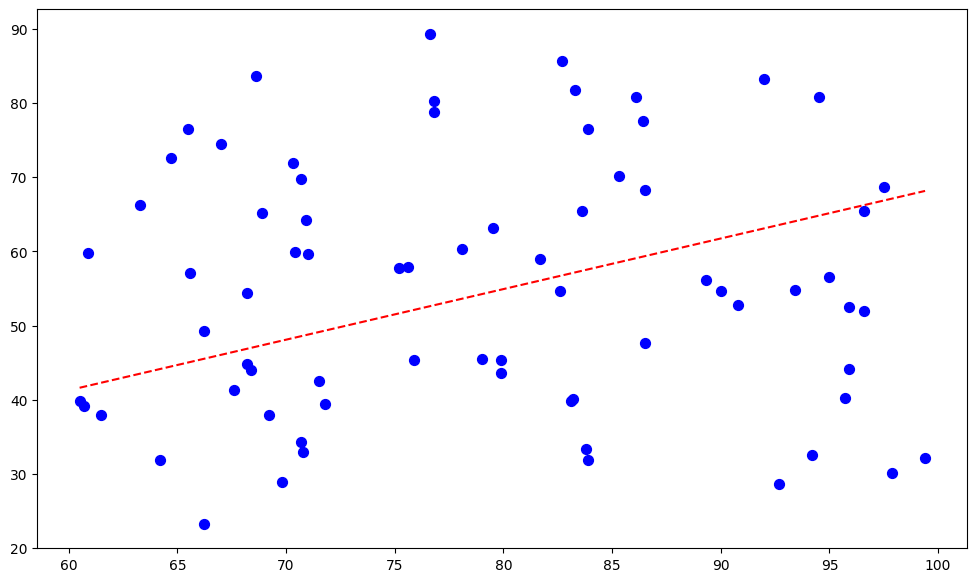

In [355]:
plt.figure(figsize=(12, 7))
plt.scatter(X, Y, color='blue', s=50)
plt.plot(x_intervel,y_hat_intervel,'r--', label="fitted line")
plt.show()